# Нейрон с различными функциями активации

В этом задании нужно будет: 
- самостоятельно реализовать класс **`Neuron()`** с различными функциями активации (ReLU, LeakyReLU и ELU)

- обучить и протестировать этот класс на сгенерированных и реальных данных

**Достаточно реализовать ReLU и ещё одну из двух.**

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

In [ ]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

В данном случае мы снова решаем задачу бинарной классификации (2 класса: 1 или 0). Мы уже выяснили (в ноутбуке про `logloss`), что плохо брать для классификации квадратичную функцию потерь, однако здесь для простоты возьмём её:

$$
Loss(\hat{y}, y) = \frac{1}{n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2
$$  

Здесь $w \cdot X_i$ - скалярное произведение, а $\hat{y_i} = \sigma(w \cdot X_i) =\frac{1}{1+e^{-w \cdot X_i}} $ - сигмоида ($i$ -- номер объекта в выборке). 

In [ ]:
def Loss(y_pred, y):
    y_pred = y_pred.reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)
    return 0.5 * np.mean((y_pred - y) ** 2)

Далее будут предложены несколько функций активации, и Вам нужно реализовать класс `Neuron` по аналогии с тем, как это было на семинаре. Сам принцип тот же, но меняются формула обновления весов и формула предсказания.

<h2 style="text-align: center;"><b>Нейрон с ReLU (Recitified Linear Unit)</b></h2>  

ReLU самая часто используемая (по крайней мере, пару лет назад) функция активации в нейронных сетях. Выглядит она очень просто:

\begin{equation*}
ReLU(x) =
 \begin{cases}
   0, &\text{$x \le 0$}\\
   x, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

Или по-другому:

$$
ReLU(x) = \max(0, x)
$$

В (свободном) переводе Rectified Linear Unit = "Усечённая линейная функция". Собственно, мы по сути просто не даём проходить отрицательным числам.

Производная здесь берётся как производная от кусочно-заданной функции, то есть на участках, где функция гладкая, и в нуле её доопредляют нулём:

\begin{equation*}
ReLU'(x) = 
 \begin{cases}
   0, &\text{$x \le 0$}\\
   1, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

Подставим ReLu в Loss:

$$Loss(\hat{y}, y) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (ReLU(w \cdot X_i) - y_i)^2 = \begin{equation*}
\frac{1}{2n}\sum_{i=1}^{n}
 \begin{cases}
    y_i^2, &{w \cdot X_i \le 0}\\
   (w \cdot X_i - y_i)^2, &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$  

(помните, что $w \cdot X_i$ -- это число в данном случае (результат скалярного произведения двух векторов)).

Тогда формула для обновления весов при градиентном спуске будет такая (в матричном виде, рекмоендуем вывести самим то, как это получается из формулы для одного объекта):

$$ \frac{\partial Loss}{\partial w} = \begin{equation*}
\frac{1}{n}\sum_{i=1}^{n}
 \begin{cases}
   0, &{w \cdot X_i \le 0}\\
   \frac{1}{n} X_i^T (w \cdot X_i - y), &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$

(напоминаем, что здесь $w \cdot X$ -- матричное произведение вектора $w$ (ведь вектор -- тоже матрица, не так ли?) и матрицы $X$ )

Почему в первом случае будет 0? Потому что в формулу $y_i^2$ не входят веса , а мы берём производную именно по весам $w$.

* Реализуйте ReLU и её производную:

In [ ]:
!gdown 1z_IAZj1niudWUFZxiLuCWuHMD8DUDSLS
!gdown 1bUpWMgIRN6Gv4KfOiyvcfhW3it1tW5AB

Downloading...
From: https://drive.google.com/uc?id=1z_IAZj1niudWUFZxiLuCWuHMD8DUDSLS
To: /content/voice.csv
100% 1.07M/1.07M [00:00<00:00, 54.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bUpWMgIRN6Gv4KfOiyvcfhW3it1tW5AB
To: /content/apples_pears.csv
100% 43.6k/43.6k [00:00<00:00, 49.6MB/s]


In [ ]:
def relu(x):
    return np.maximum(0, x)

In [ ]:
def relu_derivative(x):
    return (x > 0).astype(float)

Базовый класс для использования различных функций

In [ ]:
class BaseNeuron:
    def __init__(self, w=None, b=0, x_shape=None):
        """
        :param: w -- вектор весов
        :param: b -- смещение
        """

        w = np.zeros((x_shape[1], 1)) if w is None else w
        self.w = np.zeros((X.shape[1], 1))
        self.b = 0 if b is None else b

    def forward_pass(self, X):
        """
        :param: X -- матрица объектов размера (n, m)
        :return: y_pred -- вектор предсказаний размера (n, 1)
        """
        y_pred = self.activate(np.dot(X, self.w) + self.b)
        return y_pred

    def pred(self, X, tresh=0.5):

        return (self.forward_pass(X) > tresh).astype(int)
    

    def backward_pass(self, X, y, y_pred, learning_rate=0.005):
        """
        Обновляет значения весов нейрона в соответствие с этим объектом
        :param: X -- матрица объектов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                learning_rate - "скорость обучения" (символ alpha в формулах выше)
        В этом методе ничего возвращать не нужно, только правильно поменять веса
        с помощью градиентного спуска.
        """
        grad_w = np.mean((y_pred - y) * self.deactivate(X @ self.w + self.b) * X, axis=0).reshape(-1, 1)
        grad_b = np.mean((y_pred - y) * self.deactivate(X @ self.w + self.b))
        
        self.w -= learning_rate * grad_w
        self.b -= learning_rate * grad_b
        
    
    def fit(self, X, y, num_epochs=300):
        """
        Спускаемся в минимум
        :param: X -- матрица объектов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                num_epochs -- количество итераций обучения
        :return: losses -- вектор значений функции потерь
        """

        Loss_values = []  # значения функции потерь на различных итерациях обновления весов
        
        for i in range(num_epochs):
            y_pred = self.pred(X)
            Loss_values.append(Loss(y_pred, y))
            self.backward_pass(X, y, y_pred)
        
        return Loss_values

Теперь нужно написать нейрон с ReLU. Здесь всё очень похоже на перцептрон, но будут по-другому обновляться веса и другая функция активации:

In [ ]:
class NeuronRelu(BaseNeuron):

    def __init__(self, w=None, b=0, x_shape=None):
        super().__init__(w, b, x_shape)

    def activate(self, x):
        return relu(x)

    def deactivate(self, x):
        return relu_derivative(x)

In [ ]:
from typing import Callable
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


apples_df = pd.read_csv('/content/apples_pears.csv')
X = apples_df.drop('target', axis=1).values
y = apples_df.target.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def get_scores(neuron, number_of_iterations=500):

    start_time = time.time()
    loss_values = neuron.fit(X_train, y_train, number_of_iterations)
    train_time = start_time - time.time()
    
    for threshold in [0.5, 0.6, 0.7, 0.8, 0.9]:
        y_pred = neuron.pred(X_test, threshold)
        accuracy = accuracy_score(y_test, y_pred)
        clf_report = classification_report(y_test, y_pred, output_dict=True)['macro avg']

        print('Training time: {:.2f} sec'.format(train_time))
        print(f'Threshold is {threshold}')
        print('Report:', {"accuracy": accuracy, **clf_report})
        print()

    plt.figure(figsize=(10, 8))
    plt.plot(loss_values)
    plt.title('Функция потерь', fontsize=15)
    plt.xlabel('номер итерации', fontsize=14)
    plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
    plt.show()
    
    
    plt.scatter(apples_df.iloc[:, 0], apples_df.iloc[:, 1], c=neuron.pred(X), cmap='spring')
    plt.title('Яблоки и груши', fontsize=15)
    plt.xlabel('симметричность', fontsize=14)
    plt.ylabel('желтизна', fontsize=14)
    plt.show();

<h3 style="text-align: center;"><b>Тестирование нейрона с ReLU</b></h3>  

Здесь вам нужно самим протестировать новый нейрон **на тех же данных** ("Яблоки и Груши" и "Голос") по аналогии с тем, как это было проделано с перцептроном.
В итоге нужно вывести: 
* график, на котором будет показано, как изменяется функция потерь $Loss$ в зависимости от числа итераций обучения
* график с раскраской выборки нейроном

***ПРИМЕЧАНИЕ***: пожалуйста, почаще проверяйте `.shape` у матриц и векторов: `self.w`, `X` и `y` внутри класса. Очень часто ошибка решается транспонированием или `.reshape()`'ом. Не забывайте проверять, что на что Вы умножаете и какой вектор (какой размер) хотите получить на выходе -- это очень помогает не запутаться.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

Training time: -0.07 sec
Threshold is 0.5
Report: {'accuracy': 0.43, 'precision': 0.215, 'recall': 0.5, 'f1-score': 0.30069930069930073, 'support': 200}

Training time: -0.07 sec
Threshold is 0.6
Report: {'accuracy': 0.43, 'precision': 0.215, 'recall': 0.5, 'f1-score': 0.30069930069930073, 'support': 200}

Training time: -0.07 sec
Threshold is 0.7
Report: {'accuracy': 0.43, 'precision': 0.215, 'recall': 0.5, 'f1-score': 0.30069930069930073, 'support': 200}

Training time: -0.07 sec
Threshold is 0.8
Report: {'accuracy': 0.43, 'precision': 0.215, 'recall': 0.5, 'f1-score': 0.30069930069930073, 'support': 200}

Training time: -0.07 sec
Threshold is 0.9
Report: {'accuracy': 0.43, 'precision': 0.215, 'recall': 0.5, 'f1-score': 0.30069930069930073, 'support': 200}



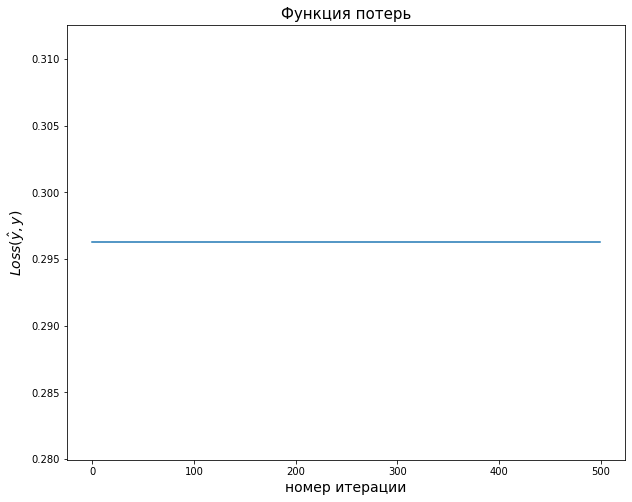

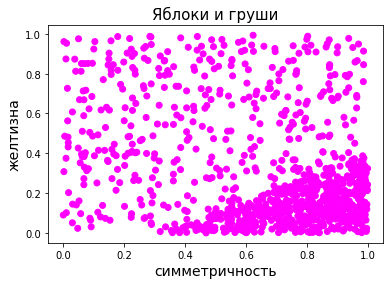

CPU times: user 529 ms, sys: 12.4 ms, total: 542 ms
Wall time: 600 ms


In [ ]:
%%time

neuron = NeuronRelu(X.shape)

get_scores(neuron)

Скорее всего сейчас у вас лосс -- это прямая линия, и вы видите, что веса не обновляются. Но почему?

Всё просто -- если присмотреться, то видно, что self.w и self.b иницилизируются нулями в начале `.fit()`-метода. Если расписать, как будет идти обновление, то видно, что из-за ReLU веса просто-напросто не будут обновляться, если начать с инициализации нулями. 

Это -- одна из причин, по которой в нейронных сетях веса инициализируют случаными числами (обычно из отрезка [0, 1)).

Обучите нейрон, инициализировав случайно веса (поставьте 10000 итераций). 

Закомментируйте инициализацию нулями в функции `.fit()` класса `NeuronReLU` 

Training time: -3.14 sec
Threshold is 0.5
Report: {'accuracy': 0.995, 'precision': 0.9956521739130435, 'recall': 0.9941860465116279, 'f1-score': 0.9948926172782757, 'support': 200}

Training time: -3.14 sec
Threshold is 0.6
Report: {'accuracy': 0.43, 'precision': 0.215, 'recall': 0.5, 'f1-score': 0.30069930069930073, 'support': 200}

Training time: -3.14 sec
Threshold is 0.7
Report: {'accuracy': 0.43, 'precision': 0.215, 'recall': 0.5, 'f1-score': 0.30069930069930073, 'support': 200}

Training time: -3.14 sec
Threshold is 0.8
Report: {'accuracy': 0.43, 'precision': 0.215, 'recall': 0.5, 'f1-score': 0.30069930069930073, 'support': 200}

Training time: -3.14 sec
Threshold is 0.9
Report: {'accuracy': 0.43, 'precision': 0.215, 'recall': 0.5, 'f1-score': 0.30069930069930073, 'support': 200}



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

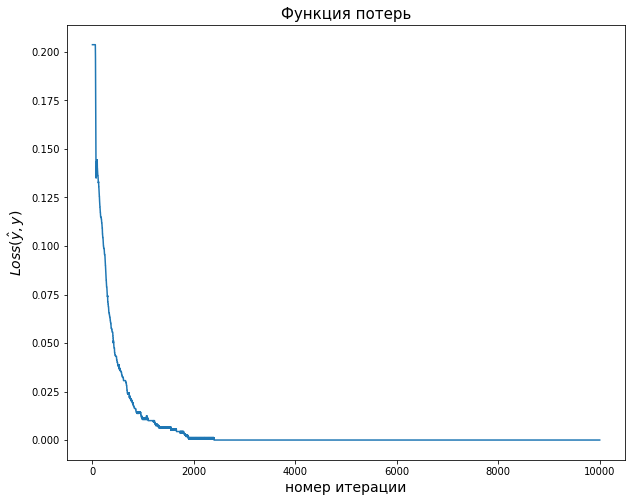

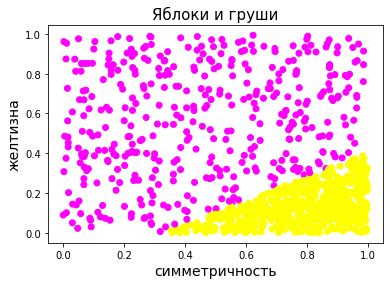

CPU times: user 3.44 s, sys: 11.3 ms, total: 3.45 s
Wall time: 4.4 s


In [ ]:
%%time

neuron = NeuronRelu(w=np.random.rand(X.shape[1], 1), b=np.random.rand(1))
get_scores(neuron, 10000)

Посмотрим, как предсказывает этот нейрон:

In [ ]:
print("Probably уже посмотрели выше :3")

Probably уже посмотрели выше :3


Есть одна тенденция: пороговая функция активации и сигмоида (обычно всё же только сигмоида) чаще используются именно на **выходном слое** нейросети в задаче классификации -- ими предсказывают вероятности объектов принадлежать одному из классов, в то время как продвинутые функции активации (ReLU и те, что будут дальше) используются внутри нейросети, то есть в **скрытых слоях**.

Нужно понимать, что ReLU не может вернуть отрицательные числа.

**Плюсы ReLU:**

* дифференцируемая (с доопределе
нием в нуле)
* нет проблемы затухающих градиентов, как в сигмоиде

**Возможные минусы ReLU:**

* не центрирована около 0 (может мешать скорости сходимсти)
* зануляет все отрицательные входы, тем самым веса у занулённых нейронов могут часто *не обновляться*, эту проблему иногда называют *мёртвые нейроны*

С последней проблемой можно побороться, а именно:

<h2 style="text-align: center;"><b>Нейрон с LeakyReLU (Leaky Recitified Linear Unit)</b></h2>  

LeakyReLU очень слабо отличается от ReLU, но часто помогает сети обучаться быстрее, поскольку нет проблемы "мёртвых нейронов":

\begin{equation*}
LeakyReLU(x) =
 \begin{cases}
   \alpha x, &\text{$x \le 0$}\\
   x, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

где $\alpha$ -- маленькое число от 0 до 1.

Производная здесь берётся так же, но вместо нуля будет $\alpha$:

\begin{equation*}
LeakyReLU'(x) = 
 \begin{cases}
   \alpha, &\text{$x \le 0$}\\
   1, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

График этой функции:

<img src="https://cdn-images-1.medium.com/max/1600/0*UtLlZJ80TMIM7kXk." width=400 height=300>

Подставим LeakyReLu в Loss:

$$
Loss(\hat{y}, y) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (LeakyReLU(w \cdot X_i) - y_i)^2 =
\begin{equation*}
\frac{1}{2n}\sum_{i=1}^{n} 
 \begin{cases}
   (\alpha \cdot w \cdot X_i - y_i)^2, &{w \cdot X_i \le 0}\\
   (w \cdot X_i - y_i)^2, &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}
$$  

Формула для обновления весов при градиентном спуске:

$$ \frac{\partial Loss}{\partial w} = \begin{equation*}
\frac{1}{n}\sum_{i=1}^{n} 
 \begin{cases}
   \alpha X_i^T (w \cdot X_i - y), &{w \cdot X_i \le 0}\\
    X_i^T (w \cdot X_i - y), &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$

* Реализуйте LeakyReLU и её производную:

In [ ]:
def leaky_relu(x, alpha=0.01):
    return np.maximum(x, alpha * x)

In [ ]:
def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

Теперь нужно написать нейрон с LeakyReLU функцией активации. Здесь всё очень похоже на перцептрон, но будут по-другому обновляться веса и другая функция активации:

In [ ]:
class NeuronLeakyReLU(BaseNeuron):
    def __init__(self, w=None, b=0, x_shape=None):
        super().__init__(w, b, x_shape)

    def activate(self, x):
        return leaky_relu(x)

    def deactivate(self, x):
        return leaky_relu_derivative(x)

Training time: -0.18 sec
Threshold is 0.5
Report: {'accuracy': 0.905, 'precision': 0.9021662111549752, 'recall': 0.9052427580579355, 'f1-score': 0.9034920634920636, 'support': 200}

Training time: -0.18 sec
Threshold is 0.6
Report: {'accuracy': 0.43, 'precision': 0.215, 'recall': 0.5, 'f1-score': 0.30069930069930073, 'support': 200}

Training time: -0.18 sec
Threshold is 0.7
Report: {'accuracy': 0.43, 'precision': 0.215, 'recall': 0.5, 'f1-score': 0.30069930069930073, 'support': 200}

Training time: -0.18 sec
Threshold is 0.8
Report: {'accuracy': 0.43, 'precision': 0.215, 'recall': 0.5, 'f1-score': 0.30069930069930073, 'support': 200}

Training time: -0.18 sec
Threshold is 0.9
Report: {'accuracy': 0.43, 'precision': 0.215, 'recall': 0.5, 'f1-score': 0.30069930069930073, 'support': 200}



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

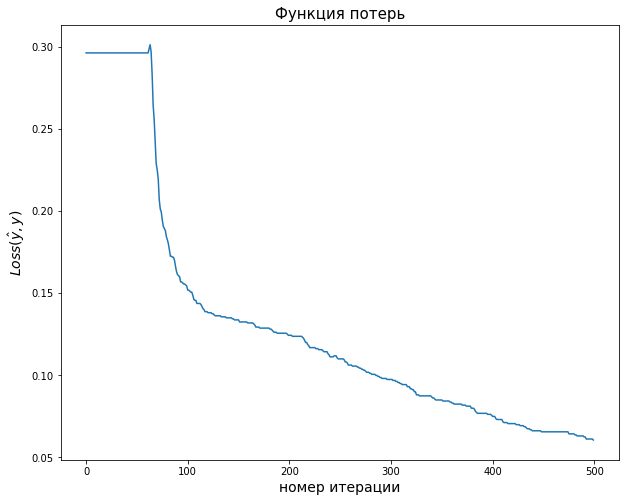

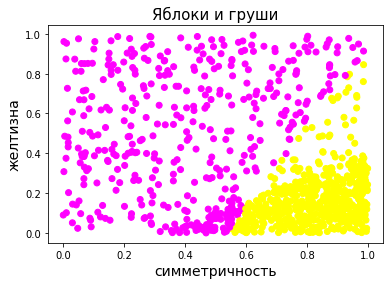

CPU times: user 748 ms, sys: 8.34 ms, total: 756 ms
Wall time: 1.06 s


In [ ]:
%%time

neuron = NeuronLeakyReLU(w=np.random.rand(X.shape[1], 1), b=np.random.rand(1))
get_scores(neuron)

**Плюсы LeakyReLU:**

* дифференцируемая (с доопределнием в нуле)
* нет проблемы затухающих градиентов, как в сигмоиде
* нет проблемы "мёртвых нейронов", как в ReLU

**Возможные минусы LeakyReLU:**

* не центрирована около 0 (может мешать скорости сходимсти)
* немного не устойчива к "шуму" (см. лекции Стэнфорда)

<h2 style="text-align: center;"><b>Нейрон с ELU (Exponential Linear Unit)</a></b></h2>  

ELU -- не так давно предложенная (в 2015 году) функция активации, которая, как говорят авторы статьи, лучше LeakyReLU. Вот формула ELU:

\begin{equation*}
ELU(\alpha, x) =
 \begin{cases}
   \alpha (e^x - 1), &\text{$x \le 0$}\\
   x, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

где $\alpha$ -- маленькое число от 0 до 1.

Производная здесь берётся так же, но вместо нуля будет $\alpha$:

\begin{equation*}
ELU'(x) = 
 \begin{cases}
   ELU(\alpha, x) + \alpha, &\text{$x \le 0$}\\
   1, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

Здесь в производной использован постой трюк -- сделано $- \alpha + \alpha$, чтобы вычислять было проще.

График этой функции:

<img src="http://p0.ifengimg.com/pmop/2017/0907/A004001DD141881BFD8AD62E5D31028C3BE3FAD1_size14_w446_h354.png" width=500 height=400>

Подставим LeakyReLu в Loss:

$$Loss(\hat{y}, y) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (ELU(\alpha, w \cdot X_i) - y_i)^2 = \begin{equation*}
\frac{1}{2n}\sum_{i=1}^{n} 
 \begin{cases}
   (\alpha (e^{w \cdot X_i} - 1) - y_i)^2, &{w \cdot X_i \le 0}\\
   (w \cdot X_i - y_i)^2, &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$  

Здесь вам нужно выписать самим град спуск для весов. Брать производную "в лоб" некрасиво и неудобно. Нужно воспользоваться **правилом цепочки**, оно же **правило взятия производной сложной функции**:

$$ \frac{\partial Loss}{\partial w} = \begin{equation*}
\frac{1}{n}\sum_{i=1}^{n} 
 \begin{cases}
   , &{w \cdot X_i \le 0}\\
   , &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$

* Реализуйте ELU и её производную:

In [ ]:
def eelu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

In [ ]:
def elu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha * np.exp(x))

Теперь нужно написать нейрон с LeakyReLU функцией активации. Здесь всё очень похоже на перцептрон, но будут по-другому обновляться веса и другая функция активации:

In [ ]:
class NeuronELU(BaseNeuron):
    def __init__(self, w=None, b=0, x_shape=None):
        super().__init__(w, b, x_shape)

    def activate(self, x):
        return eelu(x)

    def deactivate(self, x):
        return elu_derivative(x)

Training time: -0.23 sec
Threshold is 0.5
Report: {'accuracy': 0.97, 'precision': 0.975, 'recall': 0.9651162790697674, 'f1-score': 0.9691071980228607, 'support': 200}

Training time: -0.23 sec
Threshold is 0.6
Report: {'accuracy': 0.43, 'precision': 0.215, 'recall': 0.5, 'f1-score': 0.30069930069930073, 'support': 200}

Training time: -0.23 sec
Threshold is 0.7
Report: {'accuracy': 0.43, 'precision': 0.215, 'recall': 0.5, 'f1-score': 0.30069930069930073, 'support': 200}

Training time: -0.23 sec
Threshold is 0.8
Report: {'accuracy': 0.43, 'precision': 0.215, 'recall': 0.5, 'f1-score': 0.30069930069930073, 'support': 200}

Training time: -0.23 sec
Threshold is 0.9
Report: {'accuracy': 0.43, 'precision': 0.215, 'recall': 0.5, 'f1-score': 0.30069930069930073, 'support': 200}



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

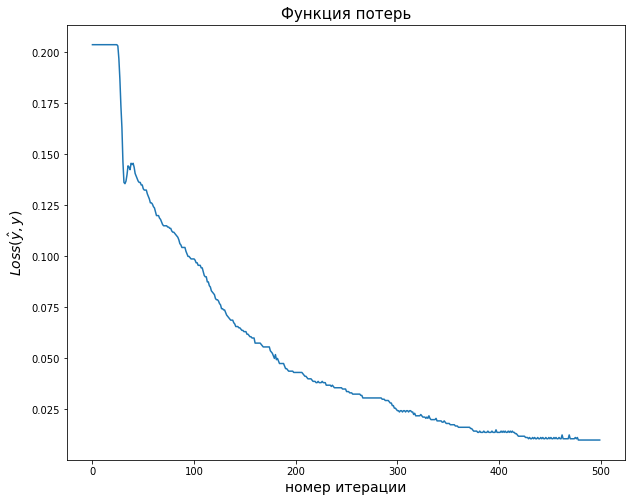

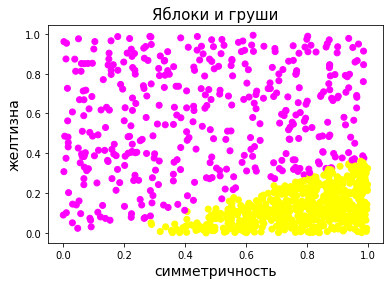

In [ ]:
get_scores(NeuronELU(w=np.random.rand(X.shape[1], 1), b=np.random.rand(1)))

**Плюсы ELU:**

* дифференцируемая (с доопределнием в нуле)
* нет проблемы затухающих градиентов, как в сигмоиде
* нет проблемы "мёртвых нейронов", как в ReLU
* более устойчива к "шуму" (см. лекции Стэнфорда)

**Возможные минусы ELU:**

* не очень хорошо центрирована около 0 (может мешать скорости сходимсти)
* вычислительно дольше, чем ReLU и LeakyReLU